In [1]:
import IndianPines as pines
from matplotlib import colors
from matplotlib import pyplot 
import pandas as pd
import numpy as np

# 145 x 145 pixels, 200 features(WaterAbsorption channels are reduced), include background category


In [2]:
conf_default = {
}
IndianPines_default = pines.load(**conf_default)

IndianPines = IndianPines_default

In [3]:
cordinates_df = pd.DataFrame(IndianPines.cordinates, columns=IndianPines.cordinate_names)
features_df = pd.DataFrame(IndianPines.features, columns=IndianPines.feature_names)
target_df = pd.DataFrame(IndianPines.target_names[IndianPines.target],columns=['category'])
hex_df = pd.DataFrame(IndianPines.hex_names[IndianPines.target],columns=['hex-color'])
data_df = pd.concat([cordinates_df,features_df,target_df,hex_df],axis=1)
data_df = data_df.set_index(['column#','row#'])
data_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 21025 entries, (0, 0) to (144, 144)
Columns: 202 entries, c00 to hex-color
dtypes: float64(200), object(2)
memory usage: 32.5+ MB


## 2nd Variable of  head 10 samples


In [4]:
display(data_df['c01'].head(10))

column#  row#
0        0       4142.0
         1       4266.0
         2       4266.0
         3       4258.0
         4       4018.0
         5       4262.0
         6       4134.0
         7       4014.0
         8       4142.0
         9       4273.0
Name: c01, dtype: float64

## datas of  sample cordicates(10,30) 


In [5]:
display(data_df.loc[(10,30)])

c00                   3162.0
c01                   4008.0
c02                   4324.0
c03                   4193.0
c04                   4514.0
                  ...       
c216                  1041.0
c217                  1025.0
c218                  1005.0
category     Soybeans-notill
hex-color            #a04e9e
Name: (10, 30), Length: 202, dtype: object

## ingredients

In [6]:
#display(pd.DataFrame(target_df['category'].value_counts()))
display(pd.DataFrame(target_df['category'].value_counts().sort_index()))

# it is different from the well-known mat-format [dataset](https://www.ehu.eus/ccwintco/index.php?title=Hyperspectral_Remote_Sensing_Scenes#Indian_Pines)
# The difference reasons why is unknown!

,category
Alfalfa,54
Bldg-Grass-Tree-Drives,380
Corn,234
Corn-min,834
Corn-notill,1434
Grass/Pasture,497
Grass/Trees,747
Grass/pasture-mowed,26
Hay-windrowed,489
Oats,20


## category colored map

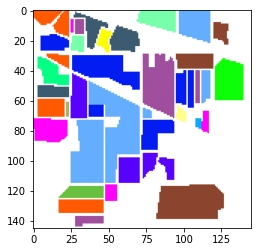

In [7]:
mapcordinates_df = pd.DataFrame([(x, y) for x in range(0,145) for y in range(0,145)],columns=['column#','row#'])
map_df = pd.merge(mapcordinates_df,data_df['hex-color'],on=['column#','row#'],how='left')
map_df = map_df.fillna('#ffffffff')
pyplot.imshow(colors.to_rgba_array(map_df['hex-color'].values).reshape([145,145,4]))


# Recategorize, no background, include Water Absorption Channels

In [8]:
# 145*145-#n_background samples, 5 features, exclude background category
conf_5f_10c = {
    "pca": 5,
    "recategorize_rule": 'recategorize17to10.csv',
    "include_background":False,
    "exclude_WaterAbsorptionChannels":False
}
IndianPines_5f_10c = pines.load(**conf_5f_10c)

IndianPines = IndianPines_5f_10c

In [9]:
cordinates_df = pd.DataFrame(IndianPines.cordinates, columns=IndianPines.cordinate_names)
features_df = pd.DataFrame(IndianPines.features, columns=IndianPines.feature_names)
target_df = pd.DataFrame(IndianPines.target_names[IndianPines.target],columns=['category'])
hex_df = pd.DataFrame(IndianPines.hex_names[IndianPines.target],columns=['hex-color'])
data_df = pd.concat([cordinates_df,features_df,target_df,hex_df],axis=1)
data_df = data_df.set_index(['column#','row#'])
data_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10320 entries, (0, 0) to (143, 32)
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PC1        10320 non-null  float64
 1   PC2        10320 non-null  float64
 2   PC3        10320 non-null  float64
 3   PC4        10320 non-null  float64
 4   PC5        10320 non-null  float64
 5   category   10320 non-null  object 
 6   hex-color  10320 non-null  object 
dtypes: float64(5), object(2)
memory usage: 615.1+ KB


## 2nd Variable of  head 5 samples


In [10]:
display(data_df['PC1'].head(10))

column#  row#
0        0       0.955829
         1       1.059690
         2       1.097705
         3       1.056844
         4       0.945539
         5       0.855142
         6       0.842147
         7       0.927748
         8       0.988220
         9       0.959378
Name: PC1, dtype: float64

## datas of  sample cordicates(10,30) 


In [11]:
display(data_df.loc[(10,30)])

PC1          0.891344
PC2          1.884929
PC3         -1.265276
PC4         -0.561144
PC5         -0.261861
category     Soybeans
hex-color     #da70d6
Name: (10, 30), dtype: object

## ingredients

In [12]:
#display(pd.DataFrame(target_df['category'].value_counts()))
display(pd.DataFrame(target_df['category'].value_counts().sort_index()))

,category
Alfalfa,54
Bldg-Grass-Tree-Drives,380
Corn,2502
Grass,1244
Hay-windrowed,489
Soybeans,4050
Stone-steel towers,95
Wheat,212
Woods,1294


## category colored map

Text(0.5, 1.0, 'Recategorized 9 categories')

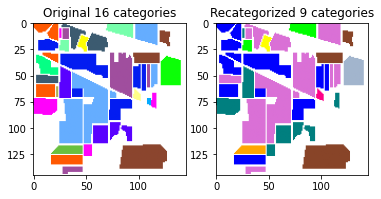

In [13]:
mapcordinates_df = pd.DataFrame([(x, y) for x in range(0,145) for y in range(0,145)],columns=['column#','row#'])
map_df2 = pd.merge(mapcordinates_df,data_df['hex-color'],on=['column#','row#'],how='left')
map_df2 = map_df2.fillna('#ffffffff')

fig = pyplot.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(colors.to_rgba_array(map_df['hex-color'].values).reshape([145,145,4]))
ax1.set_title('Original 16 categories')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(colors.to_rgba_array(map_df2['hex-color'].values).reshape([145,145,4]))
ax2.set_title('Recategorized 9 categories')


# Training

,category
Bldg-Grass-Tree-Drives,15
Woods,15
Stone-steel towers,15
Hay-windrowed,15
Soybeans,15
Corn,15
Alfalfa,15
Wheat,15
Grass,15


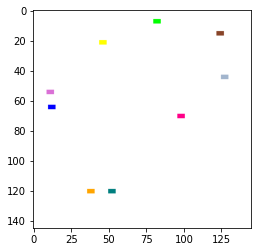

In [14]:
Traininglist='data/TrainingSampleExample.csv'
trlist_df = pd.read_csv(Traininglist)
mapcordinates_df = pd.DataFrame([(x, y) for x in range(0,145) for y in range(0,145)],columns=['column#','row#'])
trlist_df = pd.concat([mapcordinates_df,trlist_df],axis=1)
trlist_df = trlist_df.set_index(['column#','row#'])
tr_df = pd.merge(data_df,trlist_df,on=['column#','row#'],how='left')

# sampled by tr05
trdata_df = tr_df.query('tr05>0') 

# incredients
display(pd.DataFrame(trdata_df['category'].value_counts()))

# map
tr_cordinates_hex = pd.merge(mapcordinates_df,trdata_df['hex-color'],on=['column#','row#'],how='left')
tr_cordinates_hex = tr_cordinates_hex.fillna('#ffffffff')
pyplot.imshow(colors.to_rgba_array(tr_cordinates_hex['hex-color'].values).reshape([145,145,4]))

In [15]:
if conf_5f_10c in ['include_background'] and conf_default['include_background'] == False:
   new_cordinates = pd.DataFrame([(x, y) for x in range(0,145) for y in range(0,145)],columns=['column#','row#'])
   hex_old_cordinates = pd.concat([cordinates_df,hex_df],axis=1)
   cordinates_hex = pd.merge(new_cordinates, hex_old_cordinates,on=['column#','row#'],how='left')
   cordinates_hex = cordinates_hex.fillna('#ffffff')
   hex_df = cordinates_hex
   pyplot.imshow(colors.to_rgba_array(hex_df['hex-color'].values).reshape([145,145,4]))
                                                                